IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

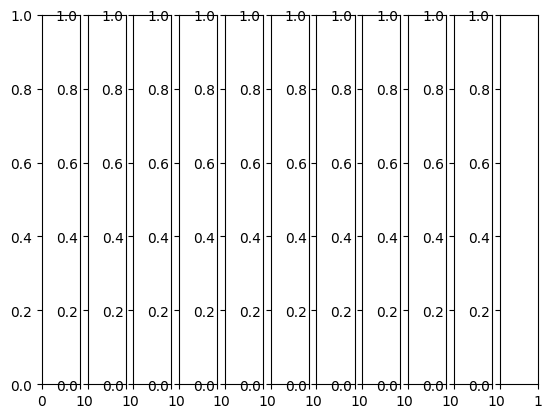

In [22]:
import numpy
import pandas
import keras
from matplotlib import pyplot
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import seaborn


features_selecionadas=["SEX", "AGE", "DIABETES", "COPD", 
                       "ASTHMA", "INMSUPR", "HIPERTENSION",
                       "CARDIOVASCULAR","OBESITY", "RENAL_CHRONIC", "TOBACCO" ]
coluna_classificador="DEATH"
features_com_classificador = features_selecionadas.copy()
features_com_classificador.append(coluna_classificador)
covid = pandas.read_csv('datasets/covid.csv', sep=',', decimal='.')
covid['DEATH'] = (covid['DATE_DIED'] == "9999-99-99").astype(int).to_numpy()[:, numpy.newaxis]  
covid = covid[features_com_classificador]

for feature in features_selecionadas:
    if(feature != "AGE"):
        covid.drop(covid.loc[covid[feature] > 2].index, inplace=True)

pyplot.figure()

fig, ax = pyplot.subplots(1,11)
x=0
for feature in features_selecionadas:
    seaborn.kdeplot(covid, x=feature,   hue='DEATH', ax=ax[x])
    x+1

pyplot.show()


